# Constructing an ML pipeline - Classification Methods with Iris Data

The modules used are matplotlib for plotting, sklearn for the ML algorithms, sklearn.datasets for example data, numpy and pandas for data manipulation

In [24]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris, load_digits
from matplotlib import pyplot as plt

# Related to bottom chapter exploring sklearn
from sklearn import svm
import pickle

Load up our old friend the Iris dataset!

In [34]:
data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']
target_names = data['target_names']

print(target_names)
print(target[0:10])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0]


It's all in ML terminology, but basically the data and metadata were stored in the sklearn.datasets package as a dictionary-like class with the labels for variables stored separately to their numerical values.  The above code has created numpy arrays of data and their labels.

Next, an excessively complicated plotting command.

[(0, '>', 'r'), (1, 'o', 'g'), (2, 'x', 'b')]


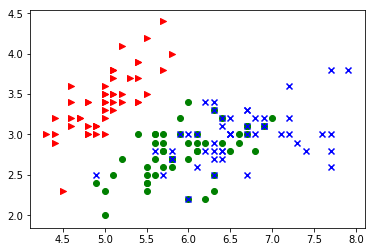

In [26]:
# just so I can be sure what that part does;
print([each for each in zip(range(3), ">ox", "rgb")])

for t, marker, c in zip(range(3), ">ox", "rgb"):
    
    # We plot each class on its own to get different coloured markers
    plt.scatter(features[target == t, 0],
                features[target == t, 1],
                marker = marker,
                c = c)

plt.show()


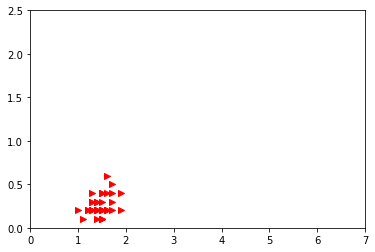

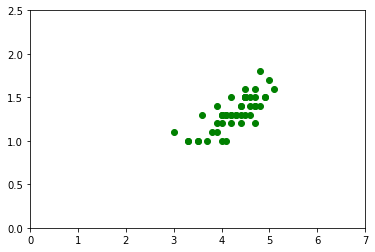

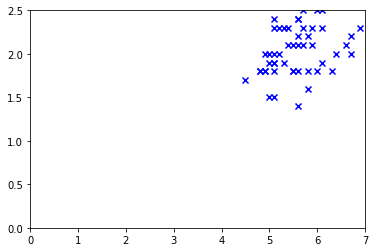

In [32]:
# Note if plt.show() is within the for loop I get three separate plots!

for t, marker, c in zip(range(3), ">ox", "rgb"):
    
    # We plot each class on its own to get different coloured markers
    plt.scatter(features[target == t, 2],
                features[target == t, 3],
                marker = marker,
                c = c)
    
    # Enforce axis ranges so different plotting areas are distinguishable
    plt.xlim(0, 7)
    plt.ylim(0, 2.5)
    plt.show()

In [37]:
# Playing games following the tutorial

plength = features[:, 2]

is_setosa = (target == 0)

max_setosa = plength[is_setosa].max()

min_non_setosa = plength[~is_setosa].min()

print('Maximum of setosa: %.2f' % max_setosa)
print('Minimum of others: %.2f' % min_non_setosa)

Maximum of setosa: 1.90
Minimum of others: 3.00


## Training versus Test Data and Cross-Validation

key idea, want to be able to use as much data as possible for training to get the best possible fit while still validating and avoiding overfitting.  Cross-validation is a useful alternative to naively splitting the dataset in half.

Extreme version, "leave-one-out" validation.

It's an end-member case of x-fold cross-validation, where x is the number of equal-sized (ish) groups the data is split in to, with one group kept for testing and the rest used to fit.  Higher numbers of groups makes for intensive recalculations, which is why "leave-one-out" validation may not be a practical approach.

Once cross-validation is complete, if the model appears robust then you can create a model using ALL of the data for whatever application it was being developed for.


Some new terminology - the "Loss function".  Refers to the evaluation metric for the performance I guess (very general term but with such a wide range of "models" in ML perhaps it's needed).  Be as un-wrong as possible ("less bad"), because correct doesn't happen in statistics.

# Giving up on the book (too basic)

Gone to find a tutorial on the sklearn commands specifically, this book is too light on theory and has me manually coding things when I just need the commands and information about how sklearn specifically works.  Humbug!


In [3]:
digits = load_digits()

# Accessing the data
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [14]:
print(np.ndim(digits.data), np.shape(digits.data))


2 (1797, 64)


In [16]:
# Accessing the true values
print(digits.target)

[0 1 2 ..., 8 9 8]


In [17]:
# Each row is an actual tiny image!  Huh!

# The first one
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

Some notes on Support Vector Machines (SVM's) before I actually try to use one.  It's a "non-probabilistic (returns a classification, not a probability distribution) binary (it's one or other, classifications are exclusive) linear (it draws boundaries in phase space) classifier".

Makes sure that gap at boundary is as wide as possible (there's our "Loss function").

There is also a thing such as support vector clustering, presumably a variation on other clustering methods that uses the same loss function as SVM's?

What the SVM defines as output is essentially a set of n-dimensional hyperplanes.  Which is the best name for a spaceship EVER.

The trick is the addition of more dimensions than there were originally.  If a set of data are not easily separable in the given dimensions, map the hyperplane into a much higher-dimensional space.  I'm not sure if a mathematical transformation is carried out upon the data itself?  Basically a graph in lower dimensional space will show the hyperplane as a wiggly line.  It's actually a flat plane, what's varying is the graph's position in higher dimensional space with position in our dimension...

I'm not going to understand this today and I don't really need to for a few months so I've saved a horribly complicated maths paper and i'll consult my engineering mathematics text book later.

It IS something I should learn though, since apparently it's useful for text analysis and classification.  Might make NLP actually interesting.

In [19]:
# Back to building something.  Define a Support Vector Classifier (SVC);

# Parameters have been set manually, don't know what they actually are.
clf = svm.SVC(gamma = 0.001, C = 100)


In [20]:
# Fit a model

# I like this system of creating numpy arrays for data and target, and keeping that plus metadata in a dictionary.
# It would be very easy to implement this for my own data.
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# And now use it to predict that last image that we didn't fit.
clf.predict(digits.data[-1:])

array([8])

In [26]:
# Saving and loading a fitted model directly using pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(digits.data[-1:])

array([8])

### SVM Example with Iris Dataset

In [27]:
# A complete example for reference
from sklearn import svm
from sklearn import datasets
import pickle

clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [28]:
# Saving a model using joblib to dump to disk, more efficient on big data but can only dump to disk, not to a string

from sklearn.externals import joblib
joblib.dump(clf, 'filename.pkl')

clf = joblib.load('filename.pkl')

## Conventions

Typecasting - input will cast to float64 before calculations unless otherwise specified.  With targets, regression casts to float64, classification targets are maintained.

Refitting and updating parameters - .set_params can be used to change parameters (such as 'gamma' used in svm earlier), after which calling .fit again will overwrite the old fit for a model object.



# Cross-validation in sklearn

Note; the main reason for having a cross-validation scheme in place is because if you tweak a model to perform well on a test set you may still be overfitting uniquely skewed data.

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

# And the juicy bit!
from sklearn.model_selection import cross_val_score

In [30]:
iris = datasets.load_iris()
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [36]:
# Training and test x and y values are from splitting x-data, y-data, test data is 40 % of dataset, random?
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

print(x_train.shape, y_train.shape)

(90, 4) (90,)


In [37]:
# Fit a model
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)

# Score the result
print( clf.score(x_test, y_test) )

0.966666666667


In [40]:
# Now using cross-validation
clf = svm.SVC(kernel='linear', C=1)

#fit and score in one
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print(scores)

[ 0.96666667  1.          0.96666667  0.96666667  1.        ]


In [41]:
# And a nice snippet to give a formatted report of mean score and 95% CI
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


## Preprocessing and Standardisation

Turns out, you should also hold out and/or cross-validate the data in the preprocessing/standardisation steps.  Makes sense since there are methods for these steps that can be thrown mightily by outliers and such, so it may introduce miss-fits.  The standardisation should therefore be part of the proceedure that is tested, assuming you have no way or no particular reason to record how the training set was transformed (specific parameters) then apply it to all new data.

In [47]:
from sklearn import preprocessing
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Scale everything properly
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_transformed = scaler.transform(x_train)

# Fit the model
clf = svm.SVC(C=1).fit(x_train_transformed, y_train)

# Apply test
x_test_transformed = scaler.transform(x_test)
clf.score(x_test_transformed, y_test)

0.93333333333333335

## Pipelines for making things easier


In [48]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))

# apply pipeline
cross_val_score(clf, iris.data, iris.target, cv=5)

array([ 0.96666667,  0.96666667,  0.96666667,  0.93333333,  1.        ])

In [50]:
# cross_val predict can be use to retrieve the predicted value for each element when it was in the test set.
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

predicted = cross_val_predict(clf, iris.data, iris.target, cv=10)

metrics.accuracy_score(iris.target, predicted)

0.96666666666666667

### One last trick - command for Leave One Out (LOO) cross-validation


In [52]:
from sklearn.model_selection import LeaveOneOut

x = [1, 2, 3, 4]

for train, test in LeaveOneOut().split(x):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]
